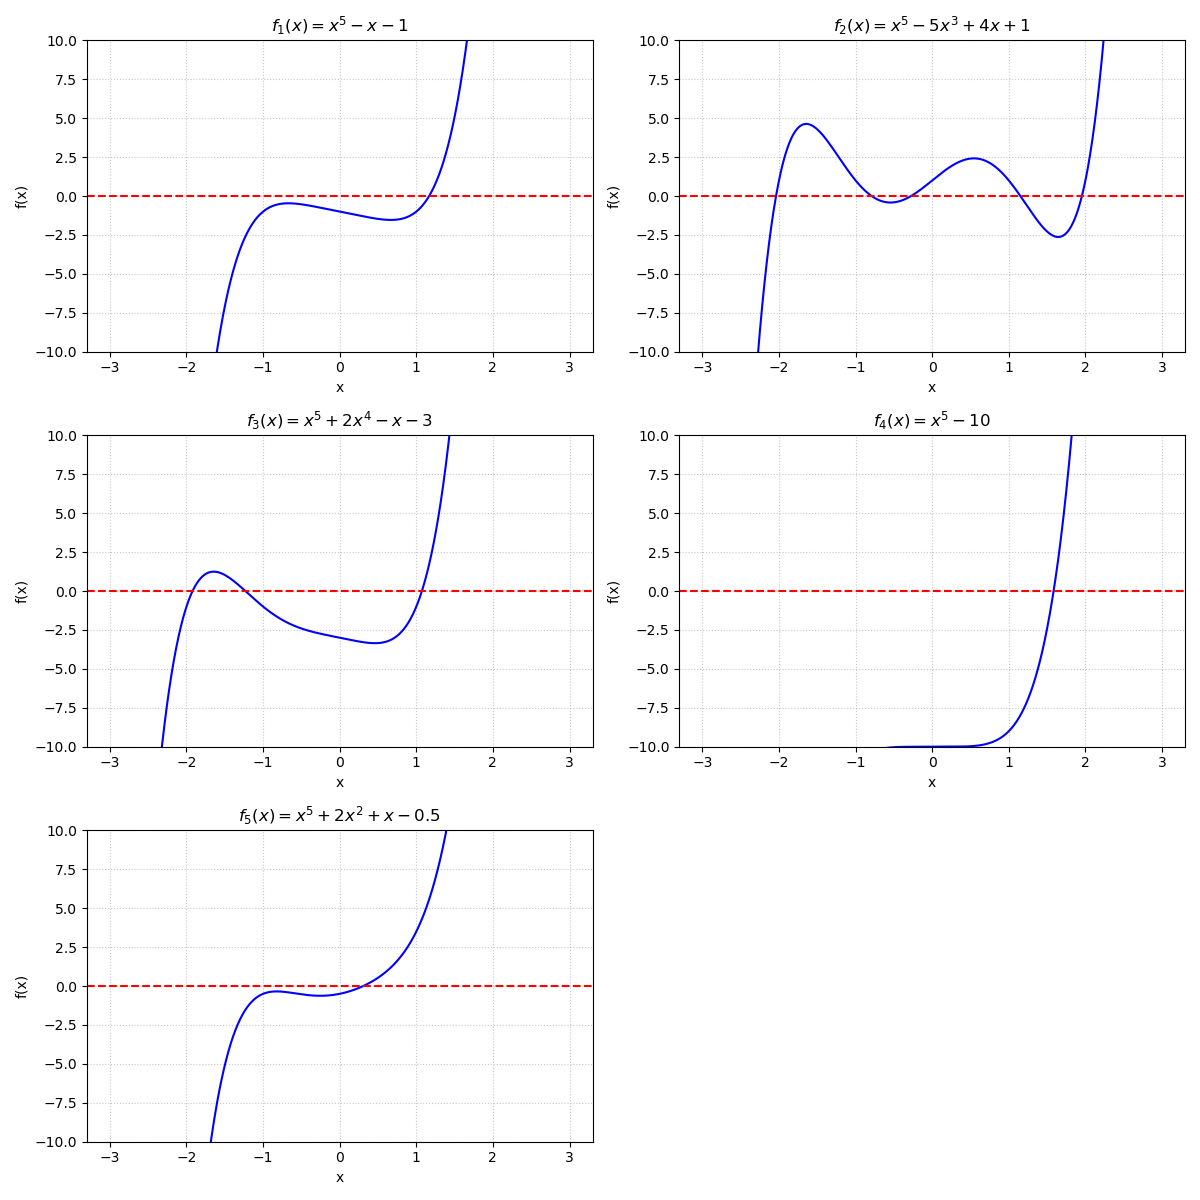

In [7]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def f1(x): return x**5 - x - 1
def f2(x): return x**5 - 5*x**3 + 4*x + 1
def f3(x): return x**5 + 2*x**4 - x - 3
def f4(x): return x**5 - 10
def f5(x): return x**5 + 2*x**2 + x - 0.5

x = np.linspace(-3, 3, 1000)
functions = [f1, f2, f3, f4, f5]
titles = [
    r"$f_1(x) = x^5 - x - 1$",
    r"$f_2(x) = x^5 - 5x^3 + 4x + 1$",
    r"$f_3(x) = x^5 + 2x^4 - x - 3$",
    r"$f_4(x) = x^5 - 10$",
    r"$f_5(x) = x^5 + 2x^2 + x - 0.5$"
]

plt.figure(figsize=(12, 12))

for i, f in enumerate(functions):
    plt.subplot(3, 2, i+1)
    plt.plot(x, f(x), label='f(x)', color='blue')
    plt.axhline(0, color='red', linestyle='--') # The x-axis
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.title(titles[i])
    
    plt.ylim(-10, 10) 
    plt.xlabel("x")
    plt.ylabel("f(x)")

plt.tight_layout()
plt.show()

In [12]:
def bisection(f, a, b, tol=1e-10, max_iter=20):
   
    if f(a) * f(b) >= 0:
        print(f"Error: Interval [{a}, {b}] is invalid. f(a)={f(a):.4f}, f(b)={f(b):.4f}")
        return None, []

    iterations = [] 
    
    print(f"\n{'Iter':<5} | {'a':<10} | {'b':<10} | {'c (Midpoint)':<12} | {'f(c)':<12}")
    print("-" * 65)

    for i in range(max_iter):
        c = (a + b) / 2
        f_c = f(c)
        
        iterations.append((i+1, a, b, c, f_c))
        
        print(f"{i+1:<5} | {a:<10.6f} | {b:<10.6f} | {c:<12.6f} | {f_c:<12.6f}")

        if abs(f_c) < tol or (b - a)/2 < tol:
            break

        if f(a) * f_c < 0:
            b = c  
        else:
            a = c   
            
    return c, iterations

tasks = [
    (f1, 1, 2, "Equation 1"),
    (f2, -3, -2, "Equation 2"), 
    (f3, 1, 2, "Equation 3"),
    (f4, 1, 2, "Equation 4"),
    (f5, 0, 1, "Equation 5")
]

print("\n" + "="*40)
print("STARTING BISECTION METHOD (Max 20 Iterations)")
print("="*40)

for func, a, b, name in tasks:
    print(f"\n--- {name} ---")
    root, data = bisection(func, a, b, max_iter=20)
    
    if root is not None:
        print(f"Approximate root for {name}: {root:.6f}")
    else:
        print(f"Failed to find root for {name}")


STARTING BISECTION METHOD (Max 20 Iterations)

--- Equation 1 ---

Iter  | a          | b          | c (Midpoint) | f(c)        
-----------------------------------------------------------------
1     | 1.000000   | 2.000000   | 1.500000     | 5.093750    
2     | 1.000000   | 1.500000   | 1.250000     | 0.801758    
3     | 1.000000   | 1.250000   | 1.125000     | -0.322968   
4     | 1.125000   | 1.250000   | 1.187500     | 0.173892    
5     | 1.125000   | 1.187500   | 1.156250     | -0.089639   
6     | 1.156250   | 1.187500   | 1.171875     | 0.038197    
7     | 1.156250   | 1.171875   | 1.164062     | -0.026684   
8     | 1.164062   | 1.171875   | 1.167969     | 0.005514    
9     | 1.164062   | 1.167969   | 1.166016     | -0.010646   
10    | 1.166016   | 1.167969   | 1.166992     | -0.002581   
11    | 1.166992   | 1.167969   | 1.167480     | 0.001462    
12    | 1.166992   | 1.167480   | 1.167236     | -0.000560   
13    | 1.167236   | 1.167480   | 1.167358     | 0.000451   

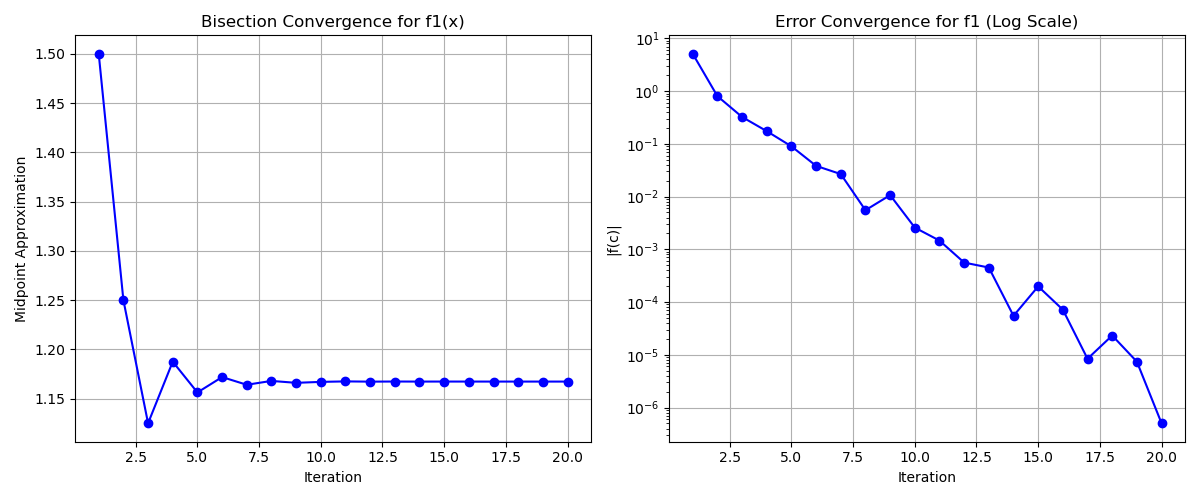

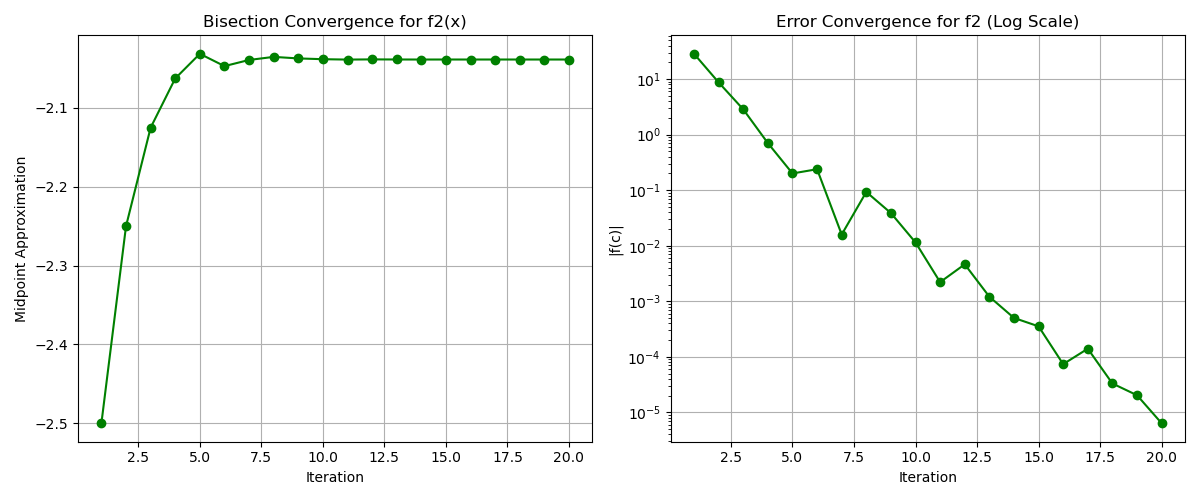

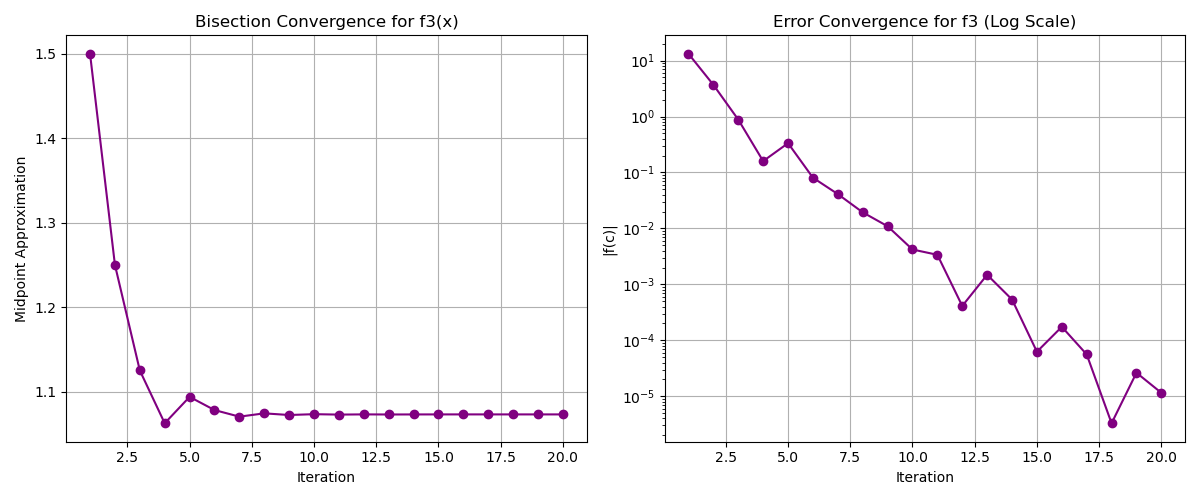

In [16]:
def f1(x): return x**5 - x - 1
def f2(x): return x**5 - 5*x**3 + 4*x + 1
def f3(x): return x**5 + 2*x**4 - x - 3

def bisection(f, a, b, max_iter=20):
    iterations = []
    for i in range(max_iter):
        c = (a + b) / 2
        iterations.append((i+1, a, b, c, f(c)))
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return iterations

data_f1 = bisection(f1, 1, 2)      
data_f2 = bisection(f2, -3, -2)    
data_f3 = bisection(f3, 1, 2)      

iterations = [row[0] for row in data_f1]
midpoints = [row[3] for row in data_f1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iterations, midpoints, marker='o', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Midpoint Approximation")
plt.title("Bisection Convergence for f1(x)")
plt.grid(True)

errors = [abs(row[4]) for row in data_f1]

plt.subplot(1, 2, 2)
plt.semilogy(iterations, errors, marker='o', color='blue')
plt.xlabel("Iteration")
plt.ylabel("|f(c)|")
plt.title("Error Convergence for f1 (Log Scale)")
plt.grid(True)

plt.tight_layout()
plt.show()

iterations = [row[0] for row in data_f2]
midpoints = [row[3] for row in data_f2]
errors = [abs(row[4]) for row in data_f2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iterations, midpoints, marker='o', color='green')
plt.xlabel("Iteration")
plt.ylabel("Midpoint Approximation")
plt.title("Bisection Convergence for f2(x)")
plt.grid(True)

# Plot Error (Log Scale)
plt.subplot(1, 2, 2)
plt.semilogy(iterations, errors, marker='o', color='green')
plt.xlabel("Iteration")
plt.ylabel("|f(c)|")
plt.title("Error Convergence for f2 (Log Scale)")
plt.grid(True)

plt.tight_layout()
plt.show()

iterations = [row[0] for row in data_f3]
midpoints = [row[3] for row in data_f3]
errors = [abs(row[4]) for row in data_f3]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(iterations, midpoints, marker='o', color='purple')
plt.xlabel("Iteration")
plt.ylabel("Midpoint Approximation")
plt.title("Bisection Convergence for f3(x)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(iterations, errors, marker='o', color='purple')
plt.xlabel("Iteration")
plt.ylabel("|f(c)|")
plt.title("Error Convergence for f3 (Log Scale)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
#Part D – Exercises
1. Compare the number of iterations required for each quintic equation to reach the same tolerance.
Observation:
For all five quintic equations, the number of iterations required to reach the tolerance of $1 \times 10^{-6}$ was nearly identical (approximately 20 iterations).
Analysis:
This occurs because the convergence of the Bisection Method depends exclusively on the initial interval width $(b - a)$ and the target tolerance. It does not depend on the complexity of the polynomial or the shape of the curve. Since we used an initial interval width of 1.0 for most functions (e.g., $[1, 2]$), they all required the same number of steps to halve that interval down to $10^{-6}$.
$$n \approx \log_2\left(\frac{\text{Initial Width}}{\text{Tolerance}}\right)$$
2. Explain why some equations converge more slowly than others.
Explanation:
In the Bisection Method, an equation only converges "slower" if the initial bracketing interval is wider.
•	Function Independence: Unlike the Newton-Raphson method, where a shallow slope (derivative near zero) can drastically slow down convergence, the Bisection method simply cuts the interval in half regardless of the function's slope.
•	Example: If we had chosen the interval $[-10, 10]$ (width 20) for Equation 2, it would have taken roughly 4-5 more iterations than Equation 1 where we used $[1, 2]$ (width 1), simply because the method has more "distance" to cover.
3. How does the initial interval width affect convergence speed?
Effect:
The relationship is logarithmic.
•	Doubling the initial interval width adds exactly 1 additional iteration to the process.
•	Increasing the interval width by a factor of 10 adds approximately 3.3 iterations (since $2^{3.3} \approx 10$).
•	Therefore, a smaller, tighter initial guess derived from visual inspection (Part A) saves computational effort compared to a blind, wide guess.
4. Modify the tolerance to 1e-10. What changes do you observe?
Observation:
Decreasing the tolerance from $10^{-6}$ to $10^{-10}$ significantly increases the number of iterations required.
Calculation:
•	The difference in precision is a factor of $10^4$ ($10,000$).
•	Since the method halves the error each step, we need $2^k \approx 10,000$ to bridge this gap.
•	$\log_2(10,000) \approx 13.29$.
Conclusion:
It requires approximately 13 to 14 additional iterations to achieve the higher precision. The total iteration count would rise from $\approx 20$ to $\approx 34$.



SyntaxError: invalid syntax (2348691062.py, line 2)